In [174]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.testing import SeqIndTester
import matplotlib
from tqdm import tqdm
import matplotlib_inline

In [ ]:
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

plt.rcParams["figure.dpi"] = 1200
plt.rcParams["font.family"] = "CMU Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.axisbelow"] = True

In [172]:
timeseries_length = 1000
num_streams = 50
cur_beta = 0.5 * np.ones((num_streams, timeseries_length, 1))
cur_beta[:, :200, :] = 0

e_detector = np.zeros((num_streams, (timeseries_length // 2) - 1))

# generate sphere data
X = np.random.normal(size=(num_streams, timeseries_length, 1))
eps = np.random.normal(size=(num_streams, timeseries_length, 1))
Y = cur_beta * (np.sin(X) + X**2) + eps

for k in tqdm(range(num_streams)):
    tester = SeqIndTester()
    tester.significance_level = 0.001
    tester.payoff_style = "hsic"
    tester.lmbd_type = "ONS"
    tester.truncation_level = 0.5

    for cur_pair in range(1, (timeseries_length // 2) - 1):
        tester.process_pair(
            X[k, 2 * cur_pair : 2 * (cur_pair + 1)],
            Y[k, 2 * cur_pair : 2 * (cur_pair + 1)],
            X[k, : 2 * cur_pair],
            Y[k, : 2 * cur_pair],
        )

        e_detector[k, cur_pair] = tester.wealth

100%|██████████| 50/50 [00:20<00:00,  2.41it/s]


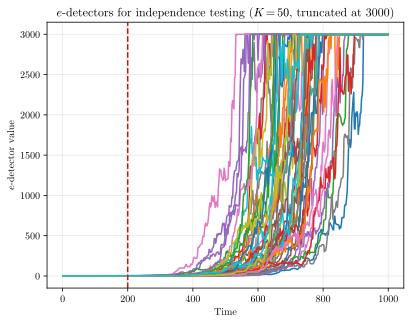

In [225]:
plt.plot(np.arange(2, 1000, 2), np.minimum(e_detector.T, 3000))
plt.xlabel("Time")
plt.ylabel("$e$-detector value")

plt.title("$e$-detectors for independence testing ($K = 50$, truncated at 3000)")
plt.axvline(200, color="red", linestyle="--")

plt.grid(alpha=0.3)

plt.savefig("e-detectors-independence.png")

plt.show()

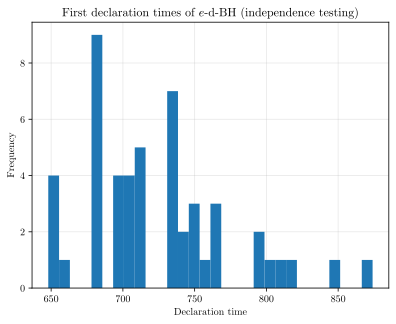

In [221]:
alpha = 0.001

first_rejection_times = np.zeros(num_streams)
for t in range((timeseries_length // 2) - 1):
    order_statistics = sorted(
        zip(e_detector[:, t], range(num_streams)), key=lambda x: -x[0]
    )

    k_star = max(
        (
            k + 1
            for k in range(num_streams)
            if (k + 1) * order_statistics[k][0] / num_streams >= 1 / alpha
        ),
        default=0,
    )

    for i in range(k_star):
        if first_rejection_times[order_statistics[i][1]] == 0:
            first_rejection_times[order_statistics[i][1]] = 2 * t + 2

plt.hist(first_rejection_times, bins=30)
plt.xlabel("Declaration time")
plt.ylabel("Frequency")

plt.title("First declaration times of $e$-d-BH (independence testing)")
plt.grid(alpha=0.3)

plt.savefig("edbh-independence.png", bbox_inches="tight")

plt.show()

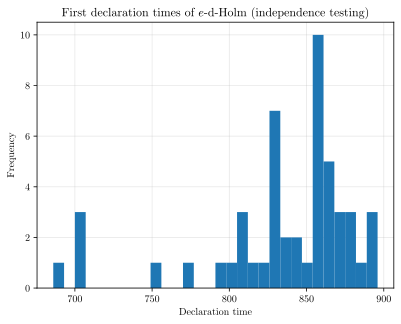

In [227]:
alpha = 0.001

first_rejection_times = np.zeros(num_streams)
for t in range((timeseries_length // 2) - 1):
    order_statistics = sorted(
        zip(e_detector[:, t], range(num_streams)), key=lambda x: -x[0]
    )

    k_star = max(
        (
            k
            for k in range(num_streams + 1)
            if all(
                order_statistics[i][0] / (num_streams - i) >= 1 / alpha
                for i in range(k)
            )
        ),
        default=0,
    )

    for i in range(k_star):
        if first_rejection_times[order_statistics[i][1]] == 0:
            first_rejection_times[order_statistics[i][1]] = 2 * t + 2

plt.hist(first_rejection_times, bins=30)
plt.xlabel("Declaration time")
plt.ylabel("Frequency")

plt.title("First declaration times of $e$-d-Holm (independence testing)")
plt.grid(alpha=0.3)

plt.savefig("edholm-independence.png", bbox_inches="tight")

plt.show()

In [54]:
timeseries_length = 1000
num_streams = 50
cur_beta = 0.5 * np.zeros((num_streams, timeseries_length, 1))
cur_beta[:200, 0] = 0

e_detector = np.zeros((num_streams, (timeseries_length // 2) - 1))

# generate sphere data
X = np.random.normal(size=(num_streams, timeseries_length, 1))
eps = np.random.normal(size=(num_streams, timeseries_length, 1))
Y = cur_beta * (np.sin(X) + X**2) + eps

for k in tqdm(range(num_streams)):
    tester = SeqIndTester()
    tester.significance_level = 0.001
    tester.payoff_style = "hsic"
    tester.lmbd_type = "ONS"
    tester.truncation_level = 0.5

    for cur_pair in range(1, (timeseries_length // 2) - 1):
        tester.process_pair(
            X[k, 2 * cur_pair : 2 * (cur_pair + 1)],
            Y[k, 2 * cur_pair : 2 * (cur_pair + 1)],
            X[k, : 2 * cur_pair],
            Y[k, : 2 * cur_pair],
        )

        e_detector[k, cur_pair] = tester.wealth

100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


ValueError: x and y must have same first dimension, but have shapes (500,) and (250, 50)

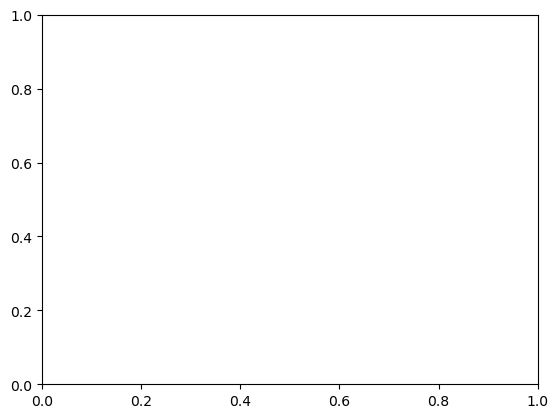

In [96]:
plt.plot(np.arange(500), e_detector.T[:250])

In [73]:
timeseries_length = 1000
num_streams = 50
cur_beta = 0.5 * np.ones((num_streams, timeseries_length, 1))
cur_beta[:, :200, :] = 0

e_detector = np.zeros((num_streams, (timeseries_length // 2) - 1))

# generate sphere data
X = np.random.normal(size=(num_streams, timeseries_length, 1))
eps = np.random.normal(size=(num_streams, timeseries_length, 1))
Y = cur_beta * (np.sin(X) + X**2) + eps

for k in tqdm(range(num_streams)):
    tester = SeqIndTester()
    tester.significance_level = 0.5
    tester.payoff_style = "hsic"
    tester.lmbd_type = "ONS"
    tester.truncation_level = 0.5

    for cur_pair in range(1, (timeseries_length // 2) - 1):
        tester.process_pair(
            X[k, 2 * cur_pair : 2 * (cur_pair + 1)],
            Y[k, 2 * cur_pair : 2 * (cur_pair + 1)],
            X[k, : 2 * cur_pair],
            Y[k, : 2 * cur_pair],
        )

        e_detector[k, cur_pair] = tester.wealth

100%|██████████| 50/50 [00:20<00:00,  2.43it/s]


In [165]:
timeseries_length = 1000
num_streams = 50
cur_beta = 0

e_detector = np.zeros((num_streams, (timeseries_length // 2) - 1))

# generate sphere data
X = np.random.standard_cauchy(size=(num_streams, timeseries_length, 1))
eps = np.random.standard_cauchy(size=(num_streams, timeseries_length, 1))
Y = cur_beta * (np.sin(X) + X**2) + eps ** 2

for k in tqdm(range(num_streams)):
    tester = SeqIndTester()
    tester.significance_level = 0.001
    tester.payoff_style = "hsic"
    tester.lmbd_type = "ONS"
    tester.truncation_level = 0.5

    for cur_pair in range(1, (timeseries_length // 2) - 1):
        tester.process_pair(
            X[k, 2 * cur_pair : 2 * (cur_pair + 1)],
            Y[k, 2 * cur_pair : 2 * (cur_pair + 1)],
            X[k, : 2 * cur_pair],
            Y[k, : 2 * cur_pair],
        )

        e_detector[k, cur_pair] = tester.wealth

100%|██████████| 50/50 [00:20<00:00,  2.48it/s]


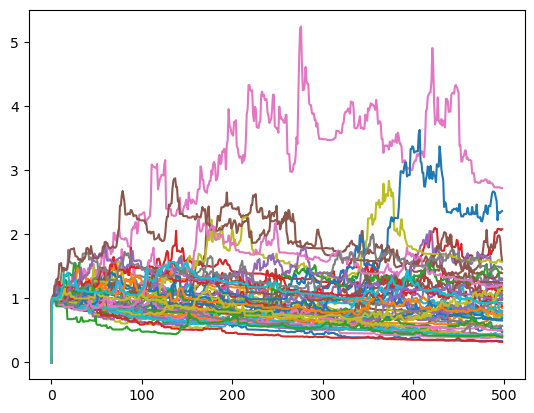

In [169]:
plt.plot(e_detector.T)

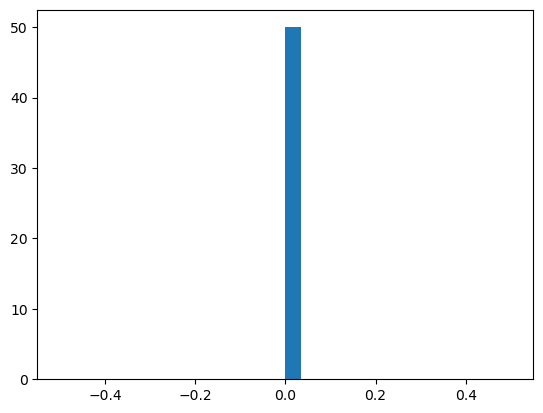

In [168]:
alpha = 0.9999999999999999
first_rejection_times = np.zeros(num_streams)
for t in range((timeseries_length // 2) - 1):
    order_statistics = sorted(
        zip(e_detector[:, t], range(num_streams)), key=lambda x: -x[0]
    )

    k_star = max(
        (
            k + 1
            for k in range(num_streams)
            if (k + 1) * order_statistics[k][0] / num_streams >= 1 / alpha
        ),
        default=0,
    )

    for i in range(k_star):
        if first_rejection_times[order_statistics[i][1]] == 0:
            first_rejection_times[order_statistics[i][1]] = t + 1

plt.hist(first_rejection_times, bins=30)

plt.show()

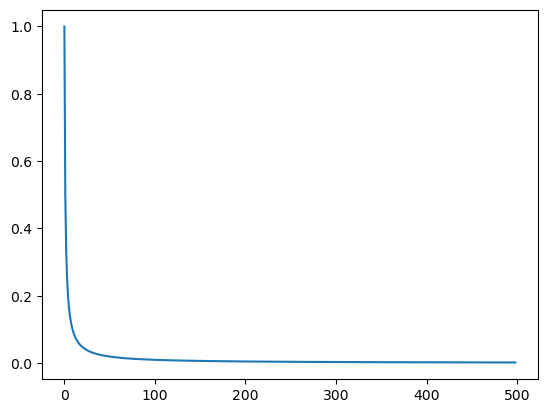

In [90]:
# get false detection rate over time
fdr = []

for t in range(timeseries_length // 2 - 1):
    fdr.append(np.count_nonzero(first_rejection_times <= t) / num_streams)

plt.plot(fdr / np.arange(1, 500))